## TASK 5 : SENTIMENT ANALYSIS ON MOVIE REVIEWS

### Algorithm: Naive Bayes Classifier, Random Forest Classifier, K-Nearest Neighbors (KNN), xgboosting classifier,logistic Regression, Decision Tree Classifier,
### Description: Perform sentiment analysis on movie reviews to determine if the sentiment is positive or negative.

#### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#### Step 1: Read the data

In [2]:
data = pd.read_csv("C:/Users/HP/Downloads/movie_reviews.csv")

#### Step 2: Data analysis and preprocessing

In [3]:
print("Data Analysis:")

Data Analysis:


In [4]:
print(data.head())  # View the first few rows of data

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [5]:
print(data.info())  # Get data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


#### Check for missing values

In [6]:
print("Missing Values:")
print(data.isnull().sum())

Missing Values:
review       0
sentiment    0
dtype: int64


#### Visualize class distribution

In [7]:
# Count occurrences of each sentiment
sentiment_counts = data['sentiment'].value_counts()

# Calculate percentages
total_samples = len(data)
positive_percentage = (sentiment_counts['positive'] / total_samples) * 100
negative_percentage = (sentiment_counts['negative'] / total_samples) * 100

# Print percentages
print("Percentage of Positive Sentiments:", positive_percentage)
print("Percentage of Negative Sentiments:", negative_percentage)

Percentage of Positive Sentiments: 50.0
Percentage of Negative Sentiments: 50.0


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


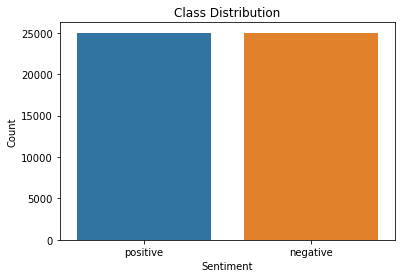

In [8]:
sns.countplot(data['sentiment'])
plt.title('Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

#### Step 3: Preprocessing

#### No specific preprocessing needed as we'll use CountVectorizer and TfidfTransformer in the pipeline

#### Step 4: Feature extraction

In [9]:
X = data['review']
y = data['sentiment']

#### Step 5: Splitting data into train and test sets

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Step 6: Model Training and Evaluation

#### Naive Bayes Classifier

In [11]:
# Create Naive Bayes model
nb_model = MultinomialNB()

# Create pipeline with CountVectorizer, TfidfTransformer, and the model
nb_pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', nb_model)
])

# Train the model
print("Training Naive Bayes Classifier...")
nb_pipeline.fit(X_train, y_train)

# Predictions
nb_predictions = nb_pipeline.predict(X_test)

# Evaluation
nb_accuracy = accuracy_score(y_test, nb_predictions)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Classification Report for Naive Bayes:")
print(classification_report(y_test, nb_predictions))
print("Confusion Matrix for Naive Bayes:")
print(confusion_matrix(y_test, nb_predictions))

Training Naive Bayes Classifier...
Naive Bayes Accuracy: 0.8635
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

    negative       0.84      0.89      0.87      4961
    positive       0.88      0.84      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

Confusion Matrix for Naive Bayes:
[[4405  556]
 [ 809 4230]]


#### Random Forest Classifier

In [12]:
# Create Random Forest model
rf_model = RandomForestClassifier()

# Create pipeline with CountVectorizer, TfidfTransformer, and the model
rf_pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', rf_model)
])

# Train the model
print("\nTraining Random Forest Classifier...")
rf_pipeline.fit(X_train, y_train)

# Predictions
rf_predictions = rf_pipeline.predict(X_test)

# Evaluation
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)
print("Classification Report for Random Forest:")
print(classification_report(y_test, rf_predictions))
print("Confusion Matrix for Random Forest:")
print(confusion_matrix(y_test, rf_predictions))


Training Random Forest Classifier...
Random Forest Accuracy: 0.8469
Classification Report for Random Forest:
              precision    recall  f1-score   support

    negative       0.84      0.85      0.85      4961
    positive       0.85      0.84      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

Confusion Matrix for Random Forest:
[[4232  729]
 [ 802 4237]]


#### K-Nearest Neighbors (KNN)

In [13]:
# Create KNN model
knn_model = KNeighborsClassifier()

# Create pipeline with CountVectorizer, TfidfTransformer, and the model
knn_pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', knn_model)
])

# Train the model
print("\nTraining K-Nearest Neighbors (KNN)...")
knn_pipeline.fit(X_train, y_train)

# Predictions
knn_predictions = knn_pipeline.predict(X_test)

# Evaluation
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("KNN Accuracy:", knn_accuracy)
print("Classification Report for KNN:")
print(classification_report(y_test, knn_predictions))
print("Confusion Matrix for KNN:")
print(confusion_matrix(y_test, knn_predictions))


Training K-Nearest Neighbors (KNN)...
KNN Accuracy: 0.769
Classification Report for KNN:
              precision    recall  f1-score   support

    negative       0.79      0.73      0.76      4961
    positive       0.75      0.81      0.78      5039

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000

Confusion Matrix for KNN:
[[3620 1341]
 [ 969 4070]]


#### Logistic Regression

In [15]:
# Create Logistic Regression model
logistic_model = LogisticRegression()

# Create pipeline with CountVectorizer, TfidfTransformer, and the model
logistic_pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', logistic_model)
])

# Train the model
print("\nTraining Logistic Regression...")
logistic_pipeline.fit(X_train, y_train)

# Predictions
logistic_predictions = logistic_pipeline.predict(X_test)

# Evaluation
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
print("Logistic Regression Accuracy:", logistic_accuracy)
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, logistic_predictions))
print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix(y_test, logistic_predictions))


Training Logistic Regression...


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.9002
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

    negative       0.91      0.89      0.90      4961
    positive       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

Confusion Matrix for Logistic Regression:
[[4403  558]
 [ 440 4599]]


#### Decision Tree Classifier

In [16]:
# Create Decision Tree model
dt_model = DecisionTreeClassifier()

# Create pipeline with CountVectorizer, TfidfTransformer, and the model
dt_pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', dt_model)
])

# Train the model
print("\nTraining Decision Tree Classifier...")
dt_pipeline.fit(X_train, y_train)

# Predictions
dt_predictions = dt_pipeline.predict(X_test)

# Evaluation
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)
print("Classification Report for Decision Tree:")
print(classification_report(y_test, dt_predictions))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test, dt_predictions))


Training Decision Tree Classifier...
Decision Tree Accuracy: 0.7242
Classification Report for Decision Tree:
              precision    recall  f1-score   support

    negative       0.72      0.72      0.72      4961
    positive       0.73      0.73      0.73      5039

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000

Confusion Matrix for Decision Tree:
[[3574 1387]
 [1371 3668]]


#### Step 7: Visualization of Results

#### Visualizing Confusion Matrix for each model

In [17]:
plt.figure(figsize=(15, 12))

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

#### Naive Bayes

Text(33.0, 0.5, 'True Label')

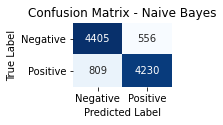

In [18]:
plt.subplot(3, 3, 1)
sns.heatmap(confusion_matrix(y_test, nb_predictions), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

#### Random Forest

Text(151.16470588235296, 0.5, 'True Label')

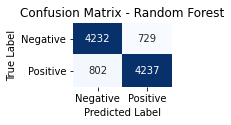

In [19]:
plt.subplot(3, 3, 2)
sns.heatmap(confusion_matrix(y_test, rf_predictions), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

#### KNN

Text(269.3294117647059, 0.5, 'True Label')

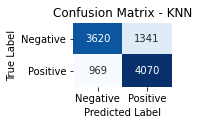

In [20]:
plt.subplot(3, 3, 3)
sns.heatmap(confusion_matrix(y_test, knn_predictions), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

#### Logistic Regression

Text(151.16470588235296, 0.5, 'True Label')

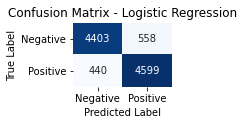

In [22]:
plt.subplot(3, 3, 5)
sns.heatmap(confusion_matrix(y_test, logistic_predictions), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

#### Decision Tree

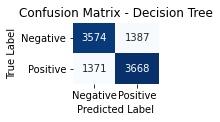

In [23]:
plt.subplot(3, 3, 6)
sns.heatmap(confusion_matrix(y_test, dt_predictions), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()